In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [2]:
df = pd.read_csv('banknotes.csv')

In [3]:
df.shape

(1372, 5)

In [4]:
df.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [7]:
df.dtypes


Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

## Separate the input and output variables

In [8]:
#input data
x = df.drop('Class',axis=1)

# output data
y = df['Class']

## Explore the data

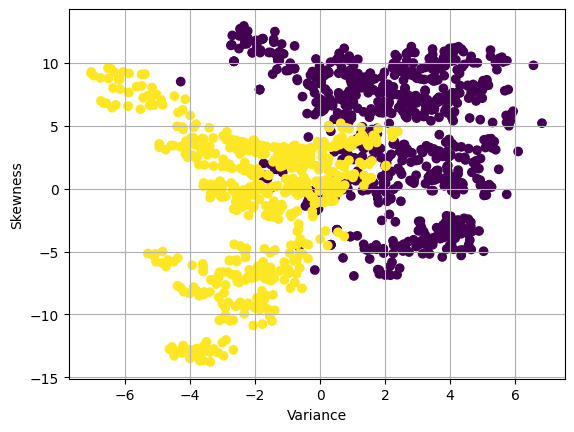

In [10]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df['Variance'],df['Skewness'],c=y)

In [11]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


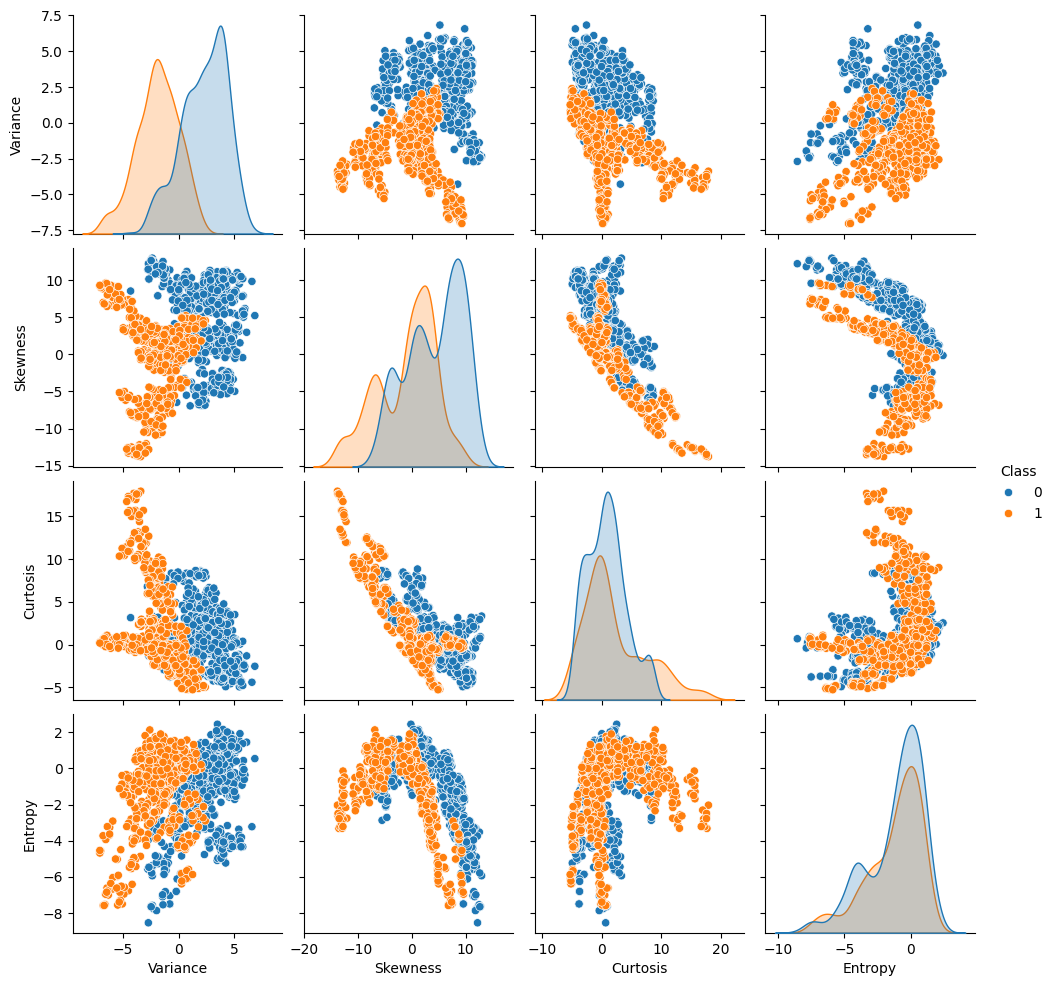

In [13]:
sns.pairplot(df,hue='Class')

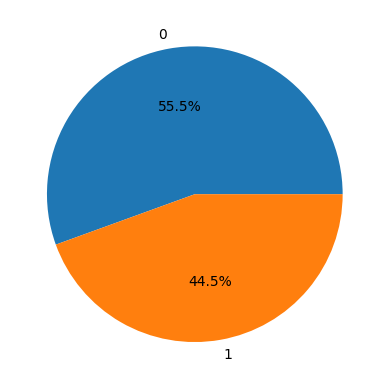

In [31]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.1f%%');

## Cross-validation

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

## Build the model


In [20]:
 from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(random_state=0)

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

## Performance Evaluation

In [23]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay


In [24]:
y_pred = dt.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



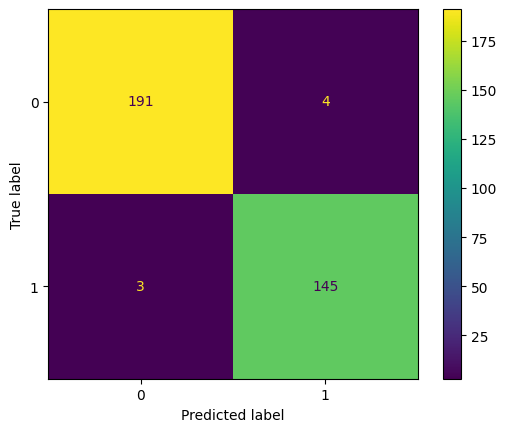

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## Feature Importance

<BarContainer object of 4 artists>

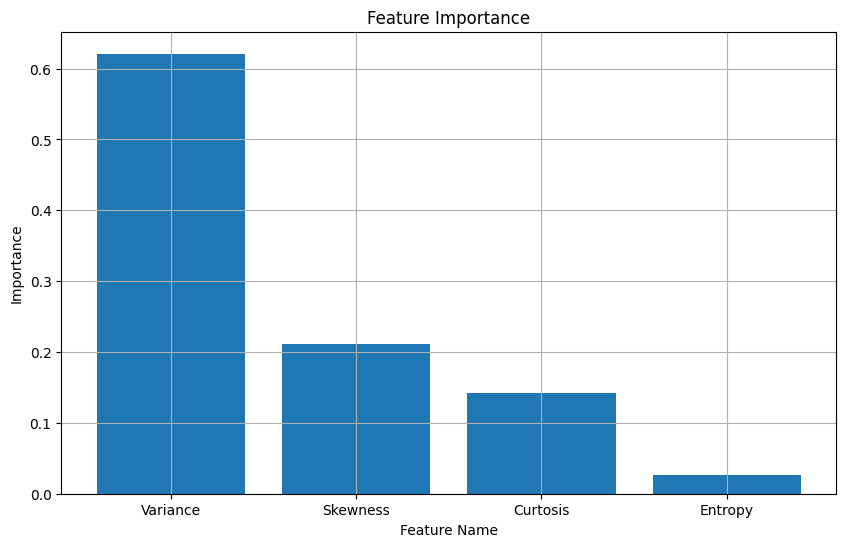

In [36]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns,dt.feature_importances_)

## Plot tree 

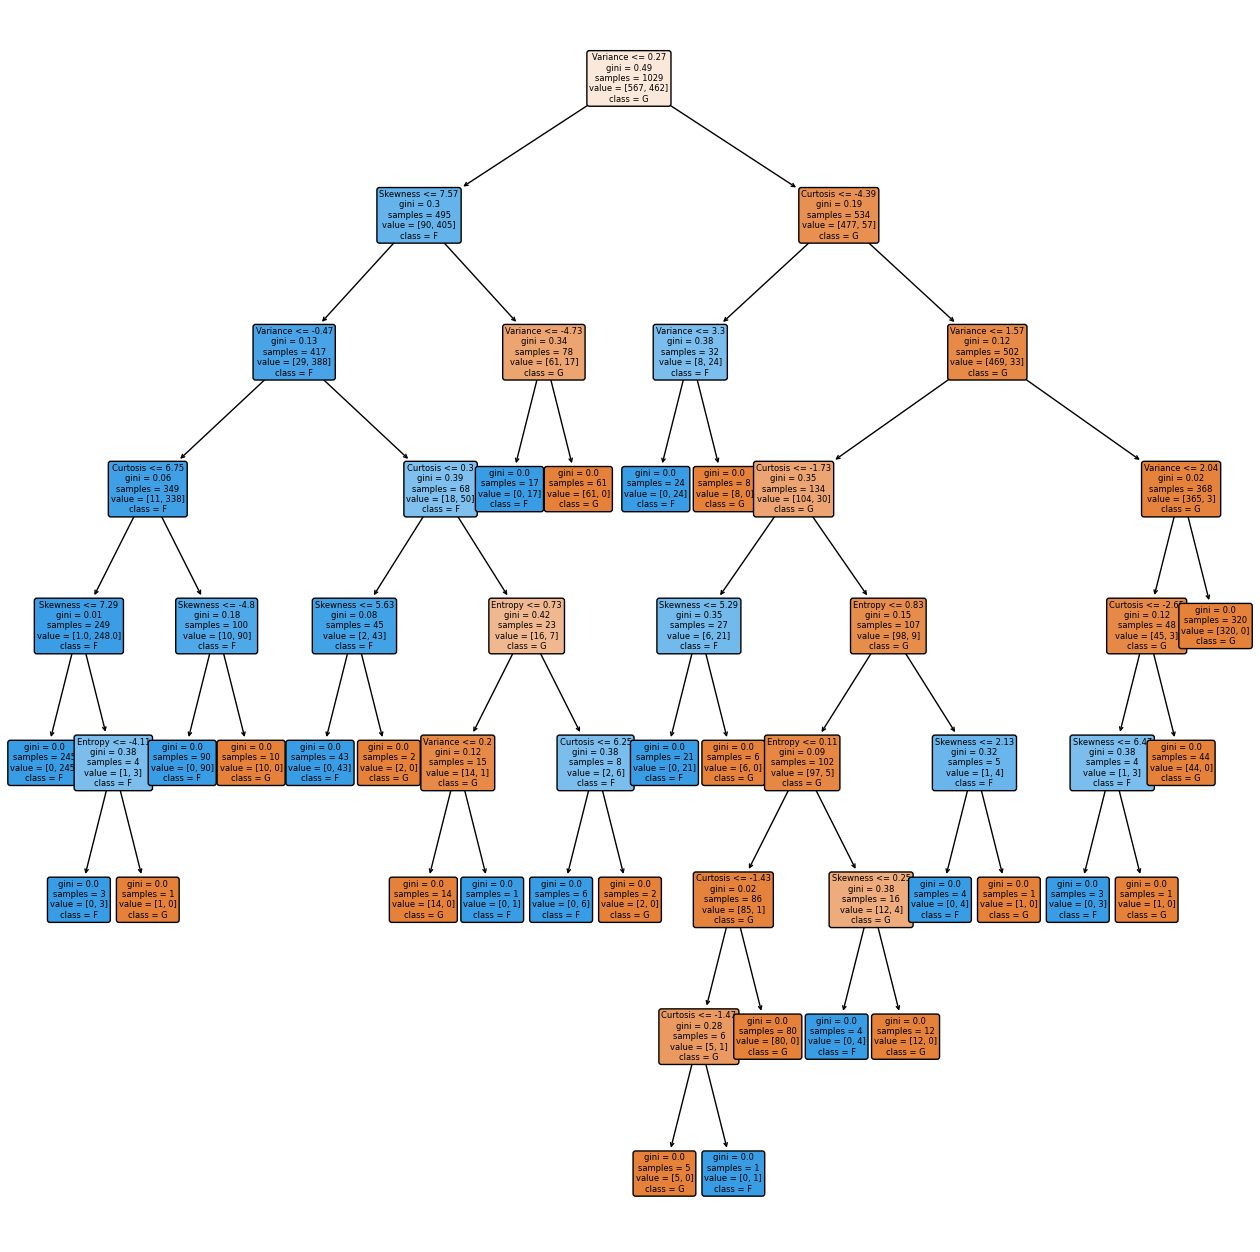

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(dt,fontsize=6,feature_names=x.columns,class_names=['G','F'],filled=True,rounded=True,precision=2);

In [40]:
new = pd.DataFrame([[0.40614,1.34920,-1.4501,-0.55949],[3.45660,9.52280,-4.0112,-3.59440],[4.54590,8.16740,-2.4586,-1.46210]],columns=x.columns)

In [41]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [42]:
y_pred = dt.predict(new)

In [43]:
y_pred   ## First is fake and other 2 are original

array([1, 0, 0], dtype=int64)

## Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier(random_state=0,n_estimators=10)

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [47]:
pred = rf.predict(x_test)

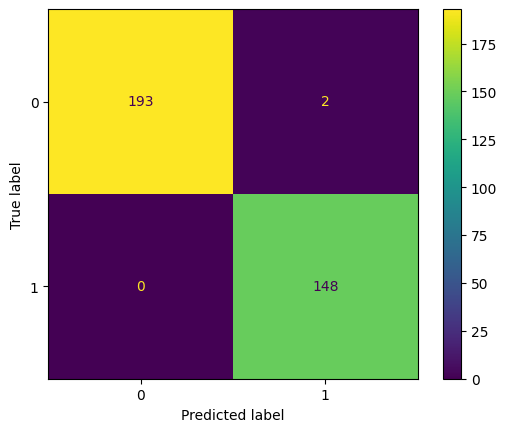

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [50]:
accuracy_score(y_test,pred)

0.9941690962099126

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



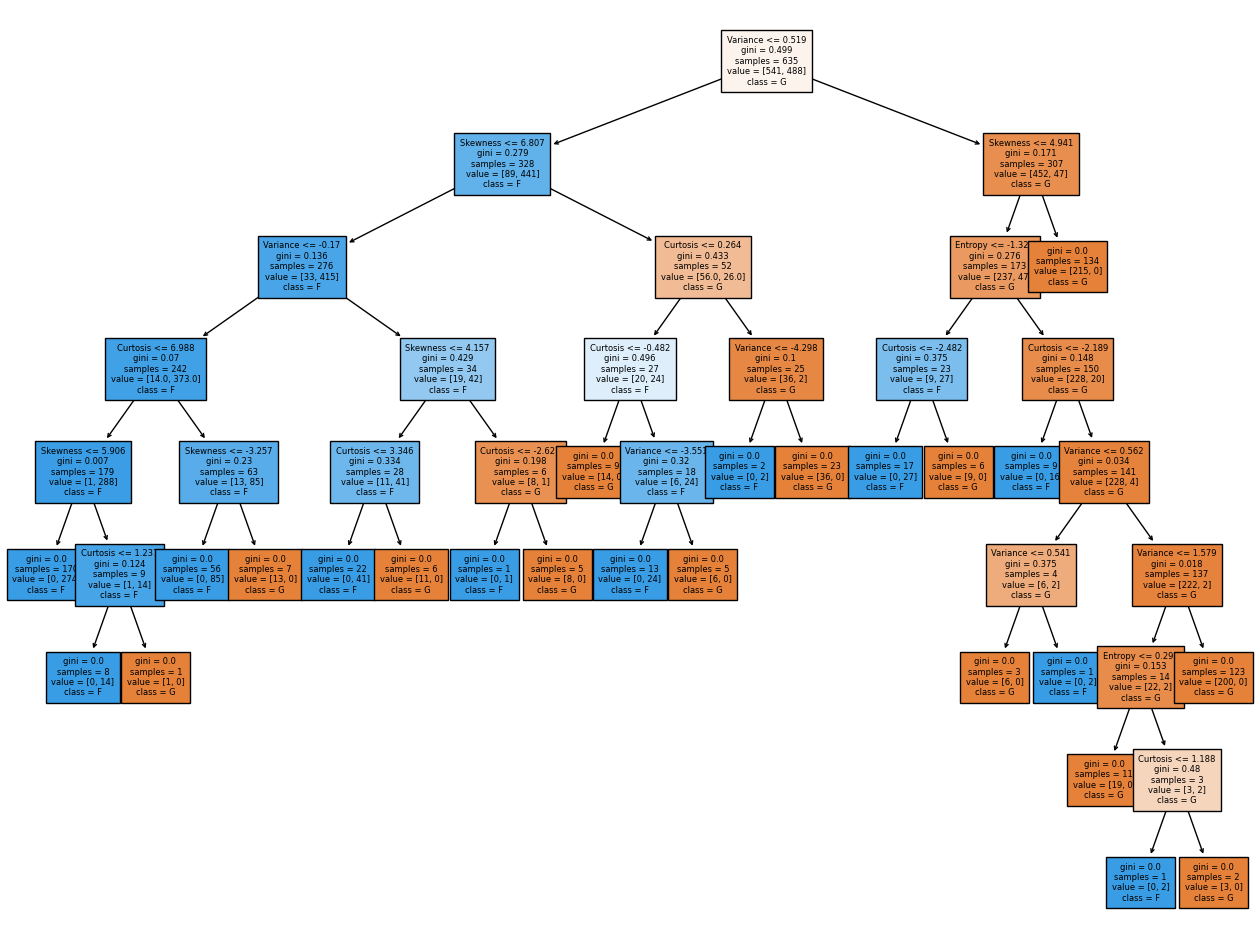

In [64]:
plt.figure(figsize=(16,12))
plot_tree(rf.estimators_[0],fontsize=6,feature_names=x.columns,class_names=['G','F'],filled=True);